<a href="https://colab.research.google.com/github/kishore145/intersting-problems/blob/master/Covid_19_time_series_analysis_and_basic_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective


Clean the timeseries data and combine into a single sheet for analysis

# Import dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 30)

# Set default font size
plt.rcParams['font.size'] = 10

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 1)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Read Data Files

In [2]:
# Set path to files:
base_path = ''

In [3]:
# Read confirmed files details
confirmed_cases = pd.read_csv(base_path + 'time_series_covid19_confirmed_global.csv')
print(f'Number of rows : {len(confirmed_cases)}')
confirmed_cases.head()

Number of rows : 266


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,...,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,...,31238,31517,31836,32022,32324,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,...,2466,2535,2580,2662,2752,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,...,13571,13907,14272,14657,15070,15500,15941,16404,16879,17348,17808,18242,18712,19195,19689
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,855,855,855,855,855,858
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,...,276,284,291,315,328,346,346,346,386,386,396,458,462,506,525


In [4]:
# Read Recovered files details
recovered_cases = pd.read_csv(base_path + 'time_series_covid19_recovered_global.csv')
print(f'Number of rows : {len(recovered_cases)}')
recovered_cases.head()

Number of rows : 253


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,...,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,...,13934,14131,15651,16041,17331,19164,19366,20103,20179,20700,20847,20882,21135,21216,21254
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,...,1438,1459,1516,1559,1592,1637,1657,1702,1744,1791,1832,1875,1881,1946,2014
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,...,9674,9897,10040,10342,10832,11181,11492,11884,12094,12329,12637,13124,13124,13743,14019
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,...,799,799,799,800,800,800,800,800,800,802,802,803,803,803,803
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,...,93,93,97,97,107,108,108,108,117,117,117,117,118,118,118


In [5]:
# Read Deaths files details
deaths = pd.read_csv(base_path + 'time_series_covid19_deaths_global.csv')
print(f'Number of rows : {len(deaths)}')
deaths.head()

Number of rows : 266


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,...,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,...,733,746,774,807,819,826,864,898,920,936,957,971,994,1010,1012
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,...,58,62,65,69,72,74,76,79,81,83,83,85,89,93,95
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,...,905,912,920,928,937,946,952,959,968,978,988,996,1004,1011,1018
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,...,11,13,15,17,18,19,19,19,21,21,22,23,23,26,26


Data looks like it's taken from JHU CSSE COVID-19 Dataset  
For field defenitions and details, refer : https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data#jhu-csse-covid-19-dataset

## Time series summary (csse_covid_19_time_series)

This folder contains daily time series summary tables, including confirmed, deaths and recovered. All data is read in from the daily case report. The time series tables are subject to be updated if inaccuracies are identified in our historical data. The daily reports will not be adjusted in these instances to maintain a record of raw data. 

Three time series tables are for the global confirmed cases, recovered cases and deaths. Australia, Canada and China are reported at the province/state level. Dependencies of the Netherlands, the UK, France and Denmark are listed under the province/state level. The US and other countries are at the country level. The tables are renamed  `time_series_covid19_confirmed_global.csv` and `time_series_covid19_deaths_global.csv`, and `time_series_covid19_recovered_global.csv`, respectively.

### Update frequency

* Once a day around 23:59 (UTC).

###  Deprecated warning
The files below were archived [here](https://github.com/CSSEGISandData/COVID-19/tree/master/archived_data/archived_time_series), and will no longer be updated. With the release of the new data structure, we are updating our time series tables to reflect these changes. Please reference `time_series_covid19_confirmed_global.csv` and `time_series_covid19_deaths_global.csv` for the latest time series data. 

* `time_series_19-covid-Confirmed.csv`
* `time_series_19-covid-Deaths.csv`	
* `time_series_19-covid-Recovered.csv`

## Let's Look at Covid-19 data provided

# Data Clearning

In [6]:
# Quick review of the data 
confirmed_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 178 entries, Province/State to 7/13/20
dtypes: float64(2), int64(174), object(2)
memory usage: 370.0+ KB


In [7]:
confirmed_cases.describe()
# This type of analysis is not that ifnroamtive and hence, we will not be running this for other data files

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,...,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02
mean,21.076624,22.829441,2.086466,2.458647,3.537594,5.390977,7.962406,11.003759,20.969925,23.180451,30.954887,37.319549,45.255639,63.109023,74.763158,...,3.862222e+04,3.927774e+04,4.009086e+04,4.087190e+04,4.163942e+04,4.236509e+04,4.305337e+04,4.368457e+04,4.447219e+04,4.526872e+04,4.612225e+04,4.698672e+04,4.781168e+04,4.853518e+04,4.926463e+04
std,24.904600,70.191330,27.279200,27.377862,34.083035,47.434934,66.289178,89.313757,219.187744,220.524977,303.897894,360.297287,443.366813,689.035590,832.953418,...,1.912648e+05,1.948511e+05,1.990591e+05,2.035107e+05,2.077693e+05,2.115818e+05,2.152661e+05,2.185190e+05,2.232169e+05,2.278585e+05,2.327247e+05,2.378347e+05,2.425360e+05,2.467222e+05,2.508038e+05
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.677575,-15.277675,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.965000e+02,2.007500e+02,2.015000e+02,2.045000e+02,2.045000e+02,2.045000e+02,2.045000e+02,2.045000e+02,2.045000e+02,2.045000e+02,2.075000e+02,2.075000e+02,2.092500e+02,2.285000e+02,2.347500e+02
50%,22.820850,20.921188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.140000e+03,1.166000e+03,1.194500e+03,1.210000e+03,1.219500e+03,1.223500e+03,1.232000e+03,1.234000e+03,1.237000e+03,1.268500e+03,1.280500e+03,1.280500e+03,1.344500e+03,1.364500e+03,1.383500e+03
75%,41.143200,77.913685,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.116800e+04,1.134025e+04,1.146000e+04,1.163150e+04,1.180025e+04,1.194550e+04,1.207925e+04,1.216600e+04,1.231225e+04,1.248650e+04,1.262450e+04,1.272250e+04,1.283775e+04,1.298425e+04,1.318775e+04
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,4903.000000,5806.000000,7153.000000,11177.000000,13522.000000,...,2.590668e+06,2.636414e+06,2.687588e+06,2.742049e+06,2.795361e+06,2.841241e+06,2.891124e+06,2.936077e+06,2.996098e+06,3.054699e+06,3.117946e+06,3.184573e+06,3.245925e+06,3.304942e+06,3.364157e+06


As is evident from review of data, Province/State and Country are object types, Latitude and Longitude are Float and count of cases are int64. This will be reflected in other data sheets as well.

In [8]:
recovered_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Columns: 178 entries, Province/State to 7/13/20
dtypes: float64(2), int64(174), object(2)
memory usage: 352.0+ KB


In [9]:
deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 178 entries, Province/State to 7/13/20
dtypes: float64(2), int64(174), object(2)
memory usage: 370.0+ KB


In [10]:
# Function to calculate missing values by column picked from stack overflow
# https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe/39734251#39734251
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [11]:
missing_values_table(confirmed_cases)

Your selected dataframe has 178 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
Province/State,185,69.5


For country level analysis that we are intenting with this data sheet, we don't need Province/State. We can drop them


In [12]:
# Dropping unnecessary columns and reducing data granularity to country level
confirmed_cases.drop(labels = ['Province/State','Lat', 'Long'] , axis = 1, inplace = True)
confirmed_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 175 entries, Country/Region to 7/13/20
dtypes: int64(174), object(1)
memory usage: 363.8+ KB


In [13]:
# Using same approach for other two data files
missing_values_table(recovered_cases)

Your selected dataframe has 178 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
Province/State,186,73.5


In [14]:
# Dropping unnecessary columns and reducing data granularity to country level
recovered_cases.drop(labels = ['Province/State','Lat', 'Long'], axis = 1, inplace = True)
recovered_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Columns: 175 entries, Country/Region to 7/13/20
dtypes: int64(174), object(1)
memory usage: 346.0+ KB


In [15]:
missing_values_table(deaths)

Your selected dataframe has 178 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
Province/State,185,69.5


In [16]:
# Dropping unnecessary columns and reducing data granularity to country level
deaths.drop(labels = ['Province/State','Lat', 'Long'], axis = 1, inplace = True)
deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 175 entries, Country/Region to 7/13/20
dtypes: int64(174), object(1)
memory usage: 363.8+ KB


In [17]:
# Groupby data to reduce granularity to Country Level
confirmed_cases_t = confirmed_cases.groupby(['Country/Region']).sum()
confirmed_cases_t

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,...,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,31238,31517,31836,32022,32324,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2466,2535,2580,2662,2752,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13571,13907,14272,14657,15070,15500,15941,16404,16879,17348,17808,18242,18712,19195,19689
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,855,855,855,855,855,858
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,276,284,291,315,328,346,346,346,386,386,396,458,462,506,525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2185,2428,2758,3080,3334,3835,4277,4341,4647,5029,5220,5551,5931,6230,6566
Western Sahara,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1128,1158,1190,1221,1240,1248,1265,1284,1297,1318,1356,1380,1389,1465,1498


In [18]:
# Review groupby o/p
confirmed_cases_t.loc['Australia']

1/22/20        0
1/23/20        0
1/24/20        0
1/25/20        0
1/26/20        4
           ...  
7/9/20      9374
7/10/20     9553
7/11/20     9797
7/12/20     9980
7/13/20    10251
Name: Australia, Length: 174, dtype: int64

Based on manual evaluation of the data sheet, the aggregation at country level is correct.

In [19]:
# Running similar exercise on other data frames
recovered_cases_t = recovered_cases.groupby(['Country/Region']).sum()
recovered_cases_t

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,...,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13934,14131,15651,16041,17331,19164,19366,20103,20179,20700,20847,20882,21135,21216,21254
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1438,1459,1516,1559,1592,1637,1657,1702,1744,1791,1832,1875,1881,1946,2014
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9674,9897,10040,10342,10832,11181,11492,11884,12094,12329,12637,13124,13124,13743,14019
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,799,799,799,800,800,800,800,800,800,802,802,803,803,803,803
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,93,93,97,97,107,108,108,108,117,117,117,117,118,118,118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,447,451,460,460,463,463,491,491,494,494,525,536,536,942,1084
Western Sahara,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,432,488,504,513,536,537,552,575,591,595,619,630,642,659,675


In [20]:
deaths_t = deaths.groupby(['Country/Region']).sum()
deaths_t

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,...,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,733,746,774,807,819,826,864,898,920,936,957,971,994,1010,1012
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,58,62,65,69,72,74,76,79,81,83,83,85,89,93,95
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,905,912,920,928,937,946,952,959,968,978,988,996,1004,1011,1018
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,11,13,15,17,18,19,19,19,21,21,22,23,23,26,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5,8,8,9,11,13,16,17,18,20,24,27,33,36,39
Western Sahara,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,304,312,318,325,335,337,338,345,348,351,361,364,365,417,424


In [21]:
# Let's create an additional dataframe to store active case count
active_cases_t = confirmed_cases_t - deaths_t - recovered_cases_t
active_cases_t

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,...,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,16571,16640,15411,15174,14174,12682,12721,12189,12285,11958,12104,12341,12237,12225,12189
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,970,1014,999,1034,1088,1108,1160,1183,1213,1232,1273,1318,1401,1415,1462
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2992,3098,3312,3387,3301,3373,3497,3561,3817,4041,4183,4122,4584,4441,4652
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,4,4,3,3,3,3,3,3,1,1,0,0,0,3
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,172,178,179,201,203,219,219,219,248,248,257,318,321,362,381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1733,1969,2290,2611,2860,3359,3770,3833,4135,4515,4671,4988,5362,5252,5443
Western Sahara,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,392,358,368,383,369,374,375,364,358,372,376,386,382,389,399


In [22]:
# Let's review one sample o/p to confrim if our data is correct
active_cases_t.loc['Australia']

1/22/20       0
1/23/20       0
1/24/20       0
1/25/20       0
1/26/20       4
           ... 
7/9/20     1692
7/10/20    1713
7/11/20    1962
7/12/20    2103
7/13/20    2308
Name: Australia, Length: 174, dtype: int64

The data tallies with manually calculated values and ccse_daily.csv count for Australia

We now have 4 data points to do time series analysis on. Let's get started.

# Exploratory Data Analysis

In [23]:
# Transposing confirmed covid cases data frame for easy analysis
confirmed_cases = confirmed_cases_t.transpose()
confirmed_cases

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,...,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,...,0,5,0,0,0,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7/9/20,33908,3188,17808,855,396,73,90693,30346,9374,18615,22464,107,31528,175494,98,...,209962,3117946,1000,52285,53577,289154,977,11564,8372,369,5220,10,1356,1895,885
7/10/20,34194,3278,18242,855,458,74,94060,30903,9553,18709,22990,108,32039,178443,98,...,210965,3184573,1006,53116,54050,289678,985,12027,8803,370,5551,10,1380,1895,942
7/11/20,34366,3371,18712,855,462,74,97509,31392,9797,18783,23521,111,32470,181129,103,...,211981,3245925,1013,53941,54453,290504,986,12513,9178,370,5931,10,1389,1895,982
7/12/20,34451,3454,19195,855,506,74,100166,31969,9980,18897,24041,111,32941,183795,103,...,212993,3304942,1025,54647,54854,291154,987,12997,9465,372,6230,10,1465,1895,985


In [24]:
confirmed_cases.set_index(pd.to_datetime(confirmed_cases.index),inplace=True)
confirmed_cases.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-07-04', '2020-07-05', '2020-07-06', '2020-07-07',
               '2020-07-08', '2020-07-09', '2020-07-10', '2020-07-11',
               '2020-07-12', '2020-07-13'],
              dtype='datetime64[ns]', length=174, freq=None)

It will be difficult to do a comaparitive time analysis of all 188 entries. Hence for plotting brevity, we will limit analysis to below countries based on our analysis of world covid data  

`'US', 'Brazil', 'India', 'Russia', 'United Kingdom', 'Italy'`

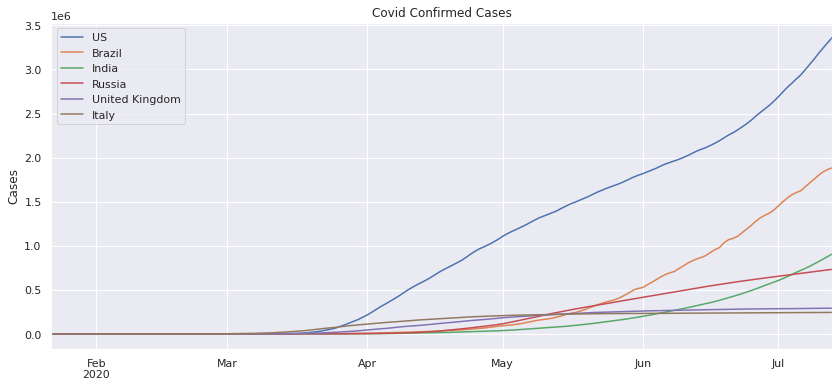

In [25]:
# Let's look at time plot of confirmed cases
ax = confirmed_cases['US'].plot(legend = True, figsize = (14,6))
ax.set_title('Covid Confirmed Cases')
ax.set_ylabel('Cases')
for country in ['Brazil', 'India', 'Russia', 'United Kingdom', 'Italy']:
  x = confirmed_cases[country].plot(ax = ax, legend = True)
  
  
plt.show()

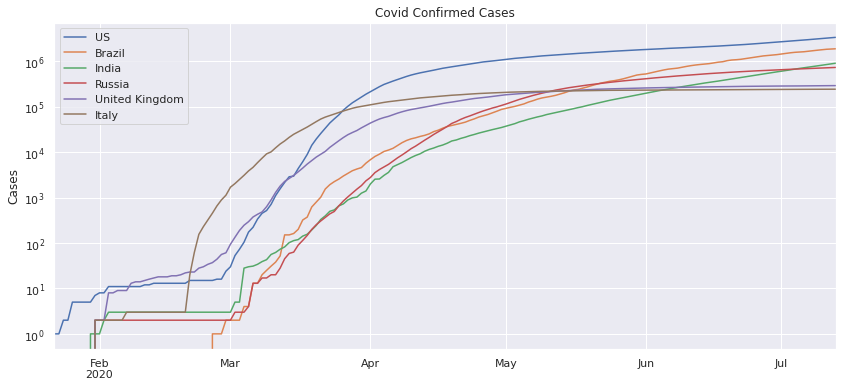

In [26]:
# Let's look at time plot of confirmed cases on lorathimc scale
ax = confirmed_cases['US'].plot(legend = True, figsize = (14,6))
ax.set_title('Covid Confirmed Cases')
ax.set_ylabel('Cases')
ax.set_yscale('log')
for country in ['Brazil', 'India', 'Russia', 'United Kingdom', 'Italy']:
  x = confirmed_cases[country].plot(ax = ax, legend = True)
  
  
plt.show()

In [27]:
# Transposing confirmed deaths data frame for easy analysis
deaths = deaths_t.transpose()
deaths

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,...,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7/9/20,957,83,988,52,22,3,1720,535,106,706,284,11,103,2238,7,...,5300,133290,0,1344,328,44687,29,51,80,0,24,1,361,42,9
7/10/20,971,85,996,52,23,3,1774,546,107,706,292,11,104,2275,7,...,5323,134092,0,1362,330,44735,29,54,83,0,27,1,364,42,13
7/11/20,994,89,1004,52,23,3,1810,559,108,706,298,11,104,2305,7,...,5344,134777,0,1389,331,44883,30,57,85,0,33,1,365,42,18
7/12/20,1010,93,1011,52,26,3,1845,565,108,708,306,11,108,2352,7,...,5363,135205,0,1400,333,44904,31,60,89,0,36,1,417,42,18


In [28]:
deaths.set_index(pd.to_datetime(deaths.index),inplace=True)
deaths.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-07-04', '2020-07-05', '2020-07-06', '2020-07-07',
               '2020-07-08', '2020-07-09', '2020-07-10', '2020-07-11',
               '2020-07-12', '2020-07-13'],
              dtype='datetime64[ns]', length=174, freq=None)

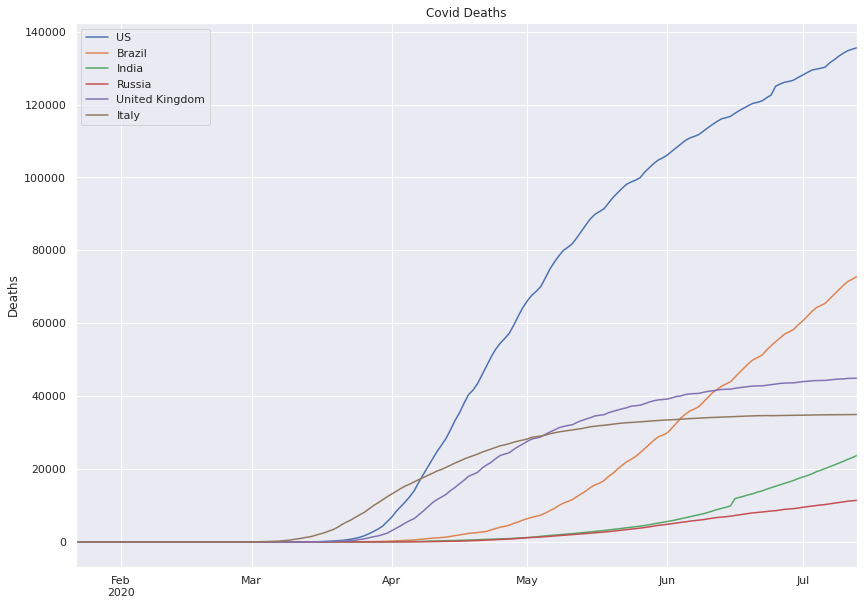

In [29]:
# Let's look at time plot of Deaths
ax = deaths['US'].plot(legend = True, figsize = (14,10))
ax.set_title('Covid Deaths')
ax.set_ylabel('Deaths')
for country in ['Brazil', 'India', 'Russia', 'United Kingdom', 'Italy']:
  x = deaths[country].plot(ax = ax, legend = True)
  
  
plt.show()

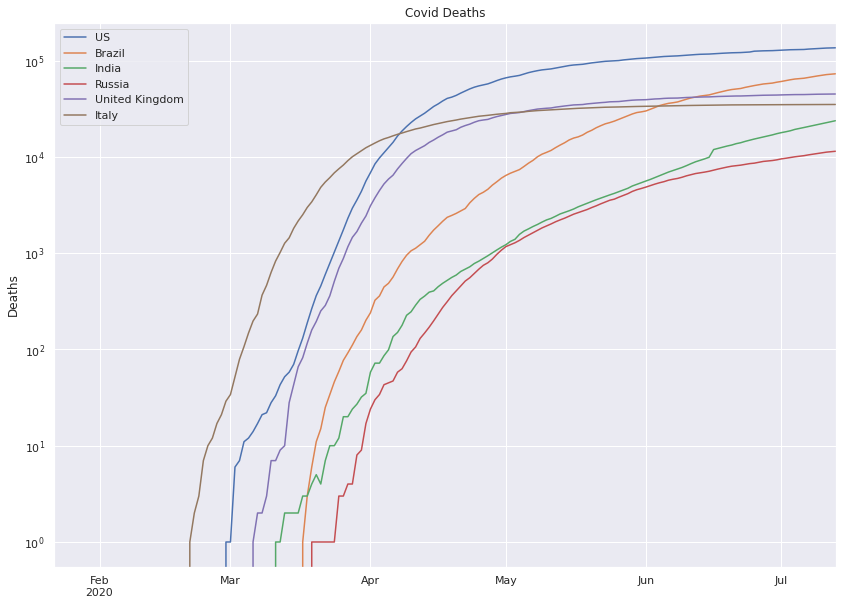

In [30]:
ax = deaths['US'].plot(legend = True, figsize = (14,10))
ax.set_title('Covid Deaths')
ax.set_ylabel('Deaths')
ax.set_yscale('log')
for country in ['Brazil', 'India', 'Russia', 'United Kingdom', 'Italy']:
  x = deaths[country].plot(ax = ax, legend = True)
  
  
plt.show()

In [31]:
# Transposing recovered covid cases data frame for easy analysis
recovered_cases = recovered_cases_t.transpose()
recovered_cases

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,...,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7/9/20,20847,1832,12637,802,117,57,38313,18000,7576,16758,13591,89,26520,84544,90,...,190390,969111,908,24606,43570,1378,878,7287,2544,347,525,8,619,1348,206
7/10/20,20882,1875,13124,803,117,57,38984,18709,7733,16808,14093,89,27213,86406,90,...,191883,983185,938,25634,43969,1378,886,7530,2671,350,536,8,630,1348,320
7/11/20,21135,1881,13124,803,118,57,41408,19419,7727,16864,14607,89,27828,88034,90,...,193217,995576,952,26513,44648,1378,896,7723,2671,350,536,8,642,1348,320
7/12/20,21216,1946,13743,803,118,57,42694,19633,7769,16952,15093,89,28425,93614,90,...,194515,1006326,972,26971,45140,1378,896,7852,2671,350,942,8,659,1412,328


In [32]:
recovered_cases.set_index(pd.to_datetime(recovered_cases.index),inplace=True)
recovered_cases.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-07-04', '2020-07-05', '2020-07-06', '2020-07-07',
               '2020-07-08', '2020-07-09', '2020-07-10', '2020-07-11',
               '2020-07-12', '2020-07-13'],
              dtype='datetime64[ns]', length=174, freq=None)

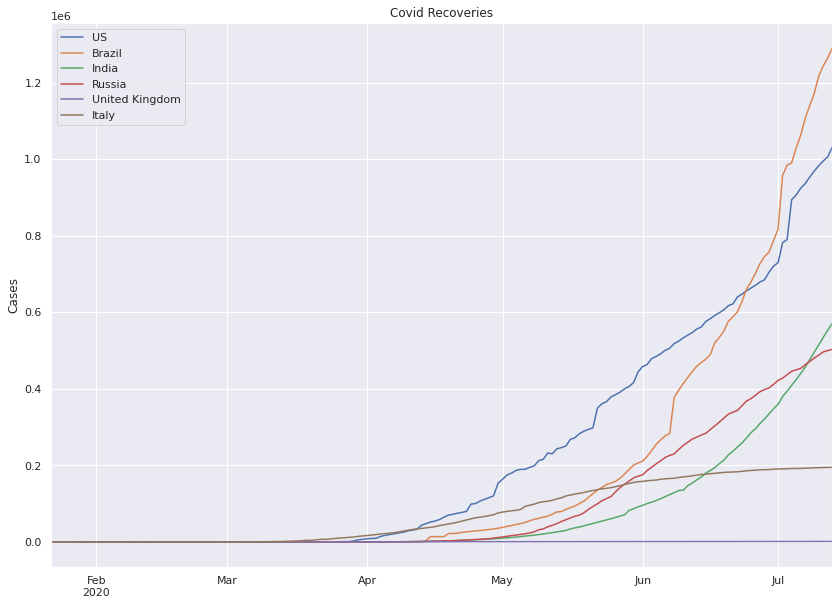

In [33]:
# Plotting recovered cases
ax = recovered_cases['US'].plot(legend = True, figsize = (14,10))
ax.set_title('Covid Recoveries')
ax.set_ylabel('Cases')
for country in ['Brazil', 'India', 'Russia', 'United Kingdom', 'Italy']:
  x = recovered_cases[country].plot(ax = ax, legend = True)
  
  
plt.show()

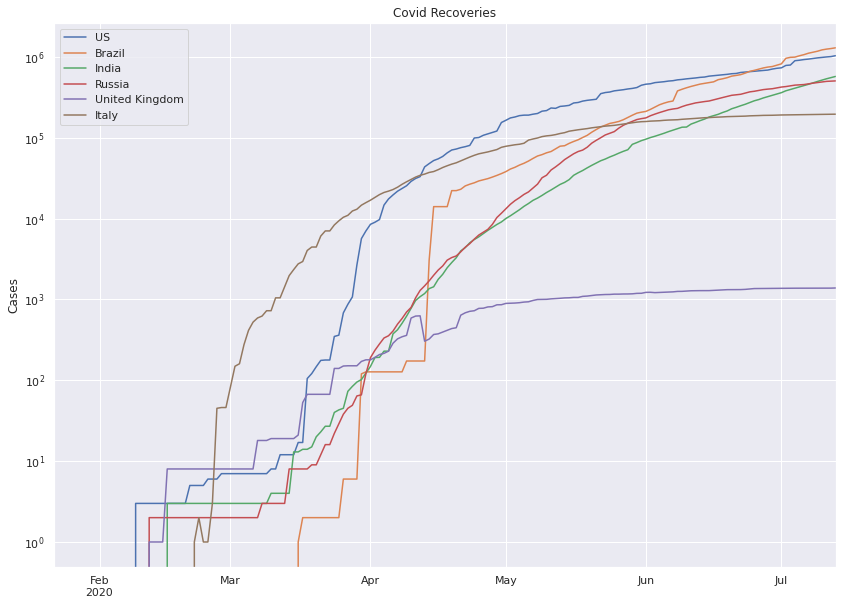

In [34]:
# Plotting recovered cases log scale
ax = recovered_cases['US'].plot(legend = True, figsize = (14,10))
ax.set_title('Covid Recoveries')
ax.set_ylabel('Cases')
ax.set_yscale('log')
for country in ['Brazil', 'India', 'Russia', 'United Kingdom', 'Italy']:
  x = recovered_cases[country].plot(ax = ax, legend = True)
  
  
plt.show()

In [35]:
# Transposing active covid cases data frame for easy analysis
active_cases  = active_cases_t.transpose()
active_cases

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,...,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,...,0,5,0,0,0,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7/9/20,12104,1273,4183,1,257,13,50660,11811,1692,1151,8589,7,4905,88712,1,...,14272,2015545,92,26335,9679,243089,70,4226,5748,22,4671,1,376,505,670
7/10/20,12341,1318,4122,0,318,14,53302,11648,1713,1195,8605,8,4722,89762,1,...,13759,2067296,68,26120,9751,243565,70,4443,6049,20,4988,1,386,505,609
7/11/20,12237,1401,4584,0,321,14,54291,11414,1962,1213,8616,11,4538,90790,6,...,13420,2115572,61,26039,9474,244243,60,4733,6422,20,5362,1,382,505,644
7/12/20,12225,1415,4441,0,362,14,55627,11771,2103,1237,8642,11,4408,87829,6,...,13115,2163411,53,26276,9381,244872,60,5085,6705,22,5252,1,389,441,639


In [36]:
active_cases.set_index(pd.to_datetime(active_cases.index),inplace=True)
active_cases.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-07-04', '2020-07-05', '2020-07-06', '2020-07-07',
               '2020-07-08', '2020-07-09', '2020-07-10', '2020-07-11',
               '2020-07-12', '2020-07-13'],
              dtype='datetime64[ns]', length=174, freq=None)

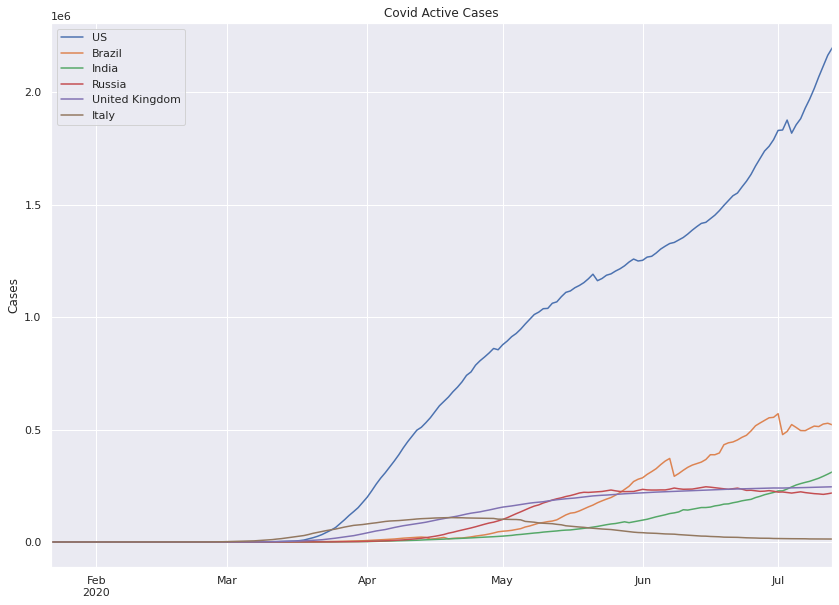

In [37]:
# Plotting active cases
ax = active_cases['US'].plot(legend = True, figsize = (14,10))
ax.set_title('Covid Active Cases')
ax.set_ylabel('Cases')
for country in ['Brazil', 'India', 'Russia', 'United Kingdom', 'Italy']:
  x = active_cases[country].plot(ax = ax, legend = True)
  
  
plt.show()

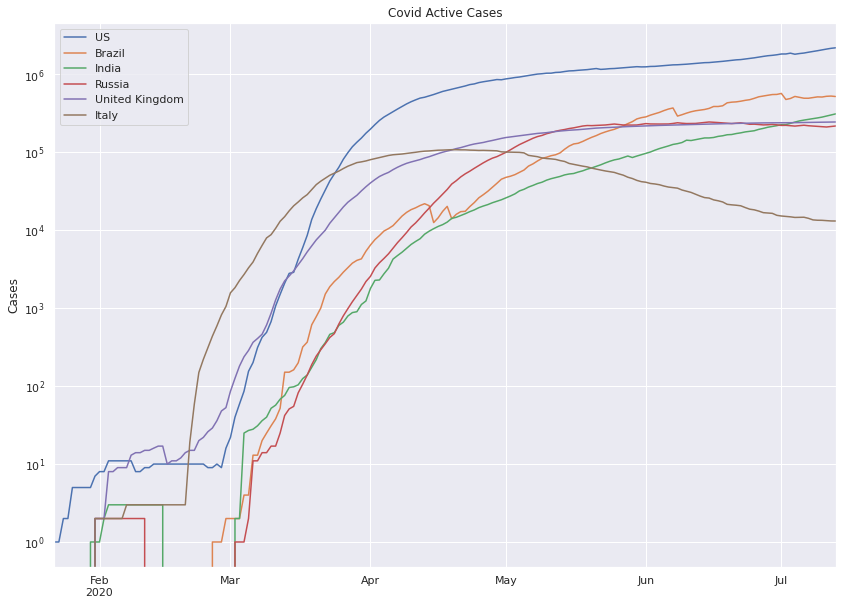

In [38]:
# Plotting active cases log scale
ax = active_cases['US'].plot(legend = True, figsize = (14,10))
ax.set_title('Covid Active Cases')
ax.set_ylabel('Cases')
ax.set_yscale('log')
for country in ['Brazil', 'India', 'Russia', 'United Kingdom', 'Italy']:
  x = active_cases[country].plot(ax = ax, legend = True)
  
  
plt.show()

Let's look at world data as a whole

In [39]:
combined_dict = {'confirmed': confirmed_cases.sum(axis = 1),
                 'recovered': recovered_cases.sum(axis = 1),
                 'deaths': deaths.sum(axis = 1),
                 'active': active_cases.sum(axis = 1)}

covid_consolidated  = pd.DataFrame(combined_dict)
covid_consolidated


,confirmed,recovered,deaths,active
2020-01-22,555,28,17,510
2020-01-23,654,30,18,606
2020-01-24,941,36,26,879
2020-01-25,1434,39,42,1353
2020-01-26,2118,52,56,2010
...,...,...,...,...
2020-07-09,12268518,6740124,554924,4973470
2020-07-10,12498467,6879521,560209,5058737
2020-07-11,12717908,7005299,565138,5147471
2020-07-12,12910357,7116957,569128,5224272


In [40]:
# Verifying index datatype
covid_consolidated.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-07-04', '2020-07-05', '2020-07-06', '2020-07-07',
               '2020-07-08', '2020-07-09', '2020-07-10', '2020-07-11',
               '2020-07-12', '2020-07-13'],
              dtype='datetime64[ns]', length=174, freq=None)

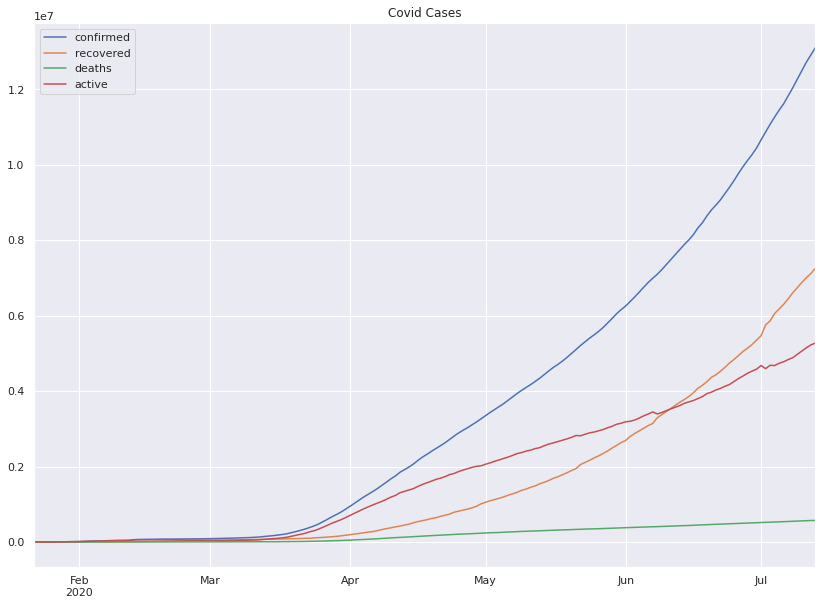

In [41]:
# Plotting combined graph
ax = covid_consolidated['confirmed'].plot(legend = True, figsize = (14,10))
ax.set_title('Covid Cases')
for metric in ['recovered', 'deaths', 'active']:
  x = covid_consolidated[metric].plot(ax = ax, legend = True)
  
  
plt.show()

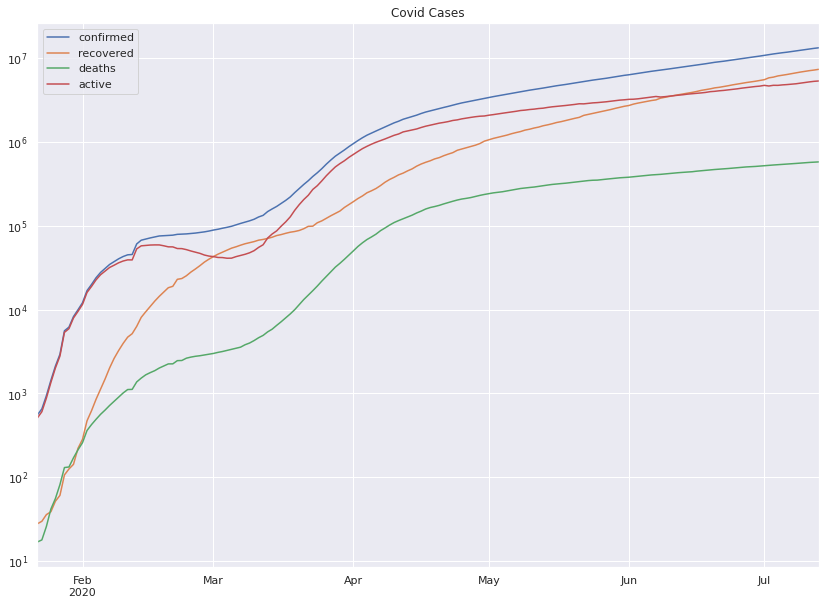

In [42]:
# Plotting combined graph on log scale
ax = covid_consolidated['confirmed'].plot(legend = True, figsize = (14,10))
ax.set_title('Covid Cases')
ax.set_yscale('log')
for metric in ['recovered', 'deaths', 'active']:
  x = covid_consolidated[metric].plot(ax = ax, legend = True)
  
  
plt.show()

In [43]:
covid_consolidated.to_csv(base_path + 'covid_consolidated_time_series.csv')
!pwd

/content


In [44]:
# Convert pandas dataframe to numpy array
dataset = covid_consolidated[['confirmed','recovered', 'deaths']].to_numpy(copy=True)
dataset

array([[     555,       28,       17],
       [     654,       30,       18],
       [     941,       36,       26],
       [    1434,       39,       42],
       [    2118,       52,       56],
       [    2927,       61,       82],
       [    5578,      107,      131],
       [    6166,      126,      133],
       [    8234,      143,      171],
       [    9927,      222,      213],
       [   12038,      284,      259],
       [   16787,      472,      362],
       [   19887,      623,      426],
       [   23898,      852,      492],
       [   27643,     1124,      564],
       [   30802,     1487,      634],
       [   34395,     2011,      719],
       [   37129,     2616,      806],
       [   40159,     3244,      906],
       [   42768,     3946,     1013],
       [   44810,     4683,     1113],
       [   45228,     5150,     1118],
       [   60381,     6295,     1371],
       [   66908,     8058,     1523],
       [   69050,     9395,     1666],
       [   71234,    1086

# Prediction

## Arima Model

In [45]:
# Except Active cases, rest of the metrics can only increase and not decrease. 
# If we can predict rest the metrics, Active cases can be found by doing basic 
# Arithmetic 
# Active = Confirmed - deaths - recovered
# Hence time series prediction will be applied only on first three metrics and not 
# on Active case count.

In [46]:
sns.set(style="whitegrid", color_codes=True)
from statsmodels.tsa.stattools import acf, pacf

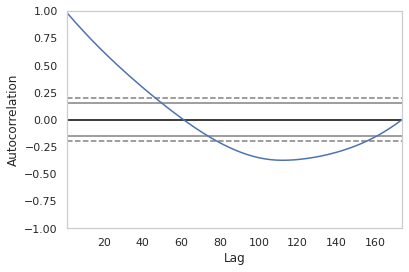

In [47]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(covid_consolidated['confirmed'])

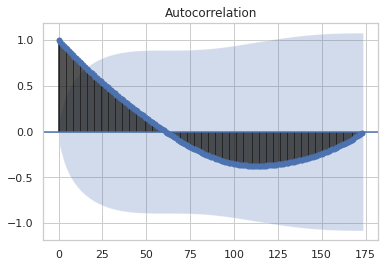

In [48]:
from statsmodels.graphics.tsaplots import plot_acf
series = covid_consolidated['confirmed']
plot_acf(series, lags = len(series)-1)

plt.show()

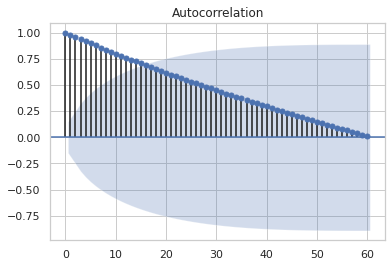

In [49]:
plot_acf(series, lags = 60)
plt.show()

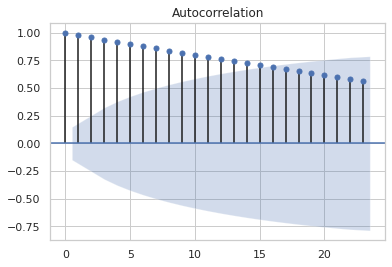

In [50]:
plot_acf(series)
plt.show()

Lags up to 16 shows a correlation. We can use that as starting point for Arima model

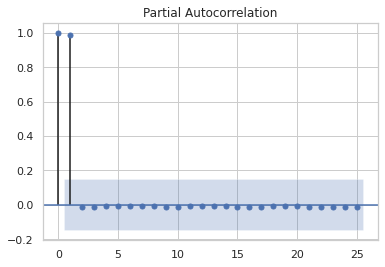

In [51]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series, lags=25)
plt.show()

In [52]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.95)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error
 


In [53]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
 

In [ ]:
# evaluate parameters
import warnings
p_values = [0, 5, 10, 16, 20]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=80828061516272.328
ARIMA(0, 0, 1) MSE=20620915827195.340
ARIMA(0, 1, 0) MSE=17825614859.893
ARIMA(0, 1, 1) MSE=6225929264.774
ARIMA(0, 2, 0) MSE=352728123.935
ARIMA(0, 2, 1) MSE=414442543.825
ARIMA(0, 2, 2) MSE=337857780.329
ARIMA(5, 1, 0) MSE=323067895.420
ARIMA(5, 2, 0) MSE=125241076.713
ARIMA(5, 2, 1) MSE=124835253.048


Classical Analysis like Arima isn't showing too much promise and is getting stuck when running on colab. Hence going with Neural Net process.

## LSTM

In [56]:
# Importing dependencies
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM, Bidirectional # wrapper to use with LSTM
from tensorflow.keras.callbacks import ModelCheckpoint
import os

In [57]:
# Set hyperparameters
# output directory name:
output_dir = 'model_output/bi-lstm'

# training:
epochs = 400 
batch_size = 32

# LSTM layer architecture:
n_lstm = 256
drop_lstm = 0.2

In [60]:
from sklearn.preprocessing import MinMaxScaler
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [61]:
scaler = MinMaxScaler()
dataset_scaled = scaler.fit_transform(dataset)

In [63]:
n_steps_in = 16
# convert into input/output
X, y = split_sequences(dataset_scaled, n_steps_in)
n_features = X.shape[2]

In [64]:
print(f'Shape of X : {X.shape}')
print(f'Shape of y : {y.shape}')
print(f'X[0]: {X[0]}, y[0]: {y[0]}')

Shape of X : (158, 16, 3)
Shape of y : (158, 3)
X[0]: [[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.55503961e-06 2.75583027e-07 1.74524334e-06]
 [2.94570231e-05 1.10233211e-06 1.57071901e-05]
 [6.70795941e-05 1.51570665e-06 4.36310835e-05]
 [1.19278050e-04 3.30699632e-06 6.80644902e-05]
 [1.81015696e-04 4.54711994e-06 1.13440817e-04]
 [3.83322868e-04 1.08855296e-05 1.98957741e-04]
 [4.28195225e-04 1.35035683e-05 2.02448227e-04]
 [5.86011608e-04 1.58460240e-05 2.68767474e-04]
 [7.15210416e-04 2.67315536e-05 3.42067694e-04]
 [8.76308281e-04 3.52746274e-05 4.22348888e-04]
 [1.23872124e-03 6.11794320e-05 6.02108952e-04]
 [1.47529319e-03 8.19859505e-05 7.13804526e-04]
 [1.78138676e-03 1.13540207e-04 8.28990586e-04]
 [2.06718094e-03 1.51019499e-04 9.54648107e-04]
 [2.30825538e-03 2.01037818e-04 1.07681514e-03]], y[0]: [0.00258245 0.00027324 0.00122516]


In [65]:
# the dataset knows the number of features
from sklearn.model_selection import train_test_split
n_features = X.shape[2]
train_size = int(len(X)*.95)
X_train, X_test, y_train, y_test =  X[0:train_size], X[train_size:], y[0:train_size], y[train_size:]

print(n_features)
print(f'Shape of X_train : {X_train.shape}')
print(f'Shape of y_train : {y_train.shape}')
print(f'X_train[0]: {X_train[0]}, y_train[0]: {y_train[0]}')
print(f'Shape of X_test : {X_test.shape}')
print(f'Shape of y_test : {y_test.shape}')
print(f'X_test[0]: {X_test[0]}, y_test[0]: {y_test[0]}')


3
Shape of X_train : (150, 16, 3)
Shape of y_train : (150, 3)
X_train[0]: [[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.55503961e-06 2.75583027e-07 1.74524334e-06]
 [2.94570231e-05 1.10233211e-06 1.57071901e-05]
 [6.70795941e-05 1.51570665e-06 4.36310835e-05]
 [1.19278050e-04 3.30699632e-06 6.80644902e-05]
 [1.81015696e-04 4.54711994e-06 1.13440817e-04]
 [3.83322868e-04 1.08855296e-05 1.98957741e-04]
 [4.28195225e-04 1.35035683e-05 2.02448227e-04]
 [5.86011608e-04 1.58460240e-05 2.68767474e-04]
 [7.15210416e-04 2.67315536e-05 3.42067694e-04]
 [8.76308281e-04 3.52746274e-05 4.22348888e-04]
 [1.23872124e-03 6.11794320e-05 6.02108952e-04]
 [1.47529319e-03 8.19859505e-05 7.13804526e-04]
 [1.78138676e-03 1.13540207e-04 8.28990586e-04]
 [2.06718094e-03 1.51019499e-04 9.54648107e-04]
 [2.30825538e-03 2.01037818e-04 1.07681514e-03]], y_train[0]: [0.00258245 0.00027324 0.00122516]
Shape of X_test : (8, 16, 3)
Shape of y_test : (8, 3)
X_test[0]: [[0.67181465 0.60158452 0.81196225]
 [0.6818

In [66]:
# define model
model = Sequential()
model.add(Bidirectional(LSTM(n_lstm, batch_size = batch_size, activation='relu', 
                             return_sequences=True, input_shape=(n_steps_in, n_features))))
model.add(Dropout(drop_lstm))
model.add(Bidirectional(LSTM(n_lstm, activation='relu', batch_size = batch_size)))
model.add(Dropout(drop_lstm))
model.add(Dense(n_features))
model.compile(optimizer='adam', loss='mse')

In [67]:
from tensorflow.keras.callbacks import ModelCheckpoint
filepath = output_dir + '/best_weights.hdf5'

modelcheckpoint = ModelCheckpoint(filepath=filepath, 
                                  monitor = 'val_loss',
                                  save_best_only = True, verbose = 1)

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [68]:
# fit model
model.fit(X_train, y_train, epochs=epochs, verbose=0, callbacks=[modelcheckpoint], 
          validation_data=(X_test, y_test))



Epoch 00001: val_loss improved from inf to 0.35459, saving model to model_output/bi-lstm/best_weights.hdf5

Epoch 00002: val_loss improved from 0.35459 to 0.13122, saving model to model_output/bi-lstm/best_weights.hdf5

Epoch 00003: val_loss did not improve from 0.13122

Epoch 00004: val_loss improved from 0.13122 to 0.02278, saving model to model_output/bi-lstm/best_weights.hdf5

Epoch 00005: val_loss improved from 0.02278 to 0.02014, saving model to model_output/bi-lstm/best_weights.hdf5

Epoch 00006: val_loss did not improve from 0.02014

Epoch 00007: val_loss improved from 0.02014 to 0.01435, saving model to model_output/bi-lstm/best_weights.hdf5

Epoch 00008: val_loss improved from 0.01435 to 0.01056, saving model to model_output/bi-lstm/best_weights.hdf5

Epoch 00009: val_loss improved from 0.01056 to 0.00851, saving model to model_output/bi-lstm/best_weights.hdf5

Epoch 00010: val_loss did not improve from 0.00851

Epoch 00011: val_loss improved from 0.00851 to 0.00529, saving 

In [69]:
!ls

covid_consolidated_time_series.csv  time_series_covid19_confirmed_global.csv
model_output			    time_series_covid19_deaths_global.csv
sample_data			    time_series_covid19_recovered_global.csv


In [70]:
# Load saved model with best validation loss
model.load_weights(filepath)

In [75]:
# demonstrate prediction
y_hat = model.predict(X_test, verbose=0)
y_hat

array([[0.8869297 , 0.8696548 , 0.9367434 ],
       [0.9026479 , 0.8885352 , 0.9460192 ],
       [0.9189108 , 0.9080628 , 0.9555154 ],
       [0.93567646, 0.9281694 , 0.96527714],
       [0.9526292 , 0.9485071 , 0.97512156],
       [0.96975845, 0.9690502 , 0.98502326],
       [0.98704123, 0.9898036 , 0.99486715],
       [1.0043117 , 1.0105399 , 1.0046122 ]], dtype=float32)

In [83]:
y_pred = scaler.inverse_transform(y_hat)
print('confirmed , recovered, deaths')
y_pred


confirmed , recovered, deaths


array([[11622737.  ,  6311409.5 ,   536757.9 ],
       [11828706.  ,  6448431.  ,   542072.75],
       [12041812.  ,  6590149.5 ,   547513.94],
       [12261506.  ,  6736070.  ,   553107.3 ],
       [12483652.  ,  6883667.5 ,   558748.  ],
       [12708111.  ,  7032756.  ,   564421.56],
       [12934582.  ,  7183370.5 ,   570061.94],
       [13160890.  ,  7333860.5 ,   575645.75]], dtype=float32)

In [86]:
y_actual = dataset[-len(y_pred):]
print('confirmed , recovered, deaths')
y_actual

confirmed , recovered, deaths


array([[11620096,  6302626,   538058],
       [11829602,  6447656,   544163],
       [12041480,  6605607,   549468],
       [12268518,  6740124,   554924],
       [12498467,  6879521,   560209],
       [12717908,  7005299,   565138],
       [12910357,  7116957,   569128],
       [13104391,  7257369,   573003]])

In [84]:
print('Predicted Active Cases')
[daycount[0] - daycount[1] - daycount[2] for daycount in y_pred]

Predicted Active Cases


[4774569.5,
 4838202.0,
 4904148.5,
 4972328.5,
 5041236.5,
 5110933.5,
 5181149.5,
 5251384.0]

In [87]:
print('Actual Active Cases')
[daycount[0] - daycount[1] - daycount[2] for daycount in y_actual]

Actual Active Cases


[4779412, 4837783, 4886405, 4973470, 5058737, 5147471, 5224272, 5274019]

Prediction is not very accurate.  
Since this doesn't account external factors like the below  
 *  Govt measures like lockdown
 *  Testing rates of different countries
 *  Social distancing measures
 *  Relative wealth and awareness of population
 *  Population density of different places etc.  
There is no purpose in fine tuning the model without all the variables..